In [9]:
%load_ext autoreload
%autoreload 2

from setup import setup_project_env
setup_project_env('~/weatherpy-work')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

from datasrcs import stormevents
from algs.clusters import st_clusters
from plotting.maps import CartopyMap
from plotting.mapareas import central_plains

In [90]:
events = stormevents.load_events('1999-05-03 00:00', '1999-05-04 00:00', eventtypes=['Tornado'], tz='CST')

In [118]:
clusters = st_clusters(events, eps_km=120, eps_min=90, min_samples=30)

../algs/clusters.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [119]:
len(clusters)

3

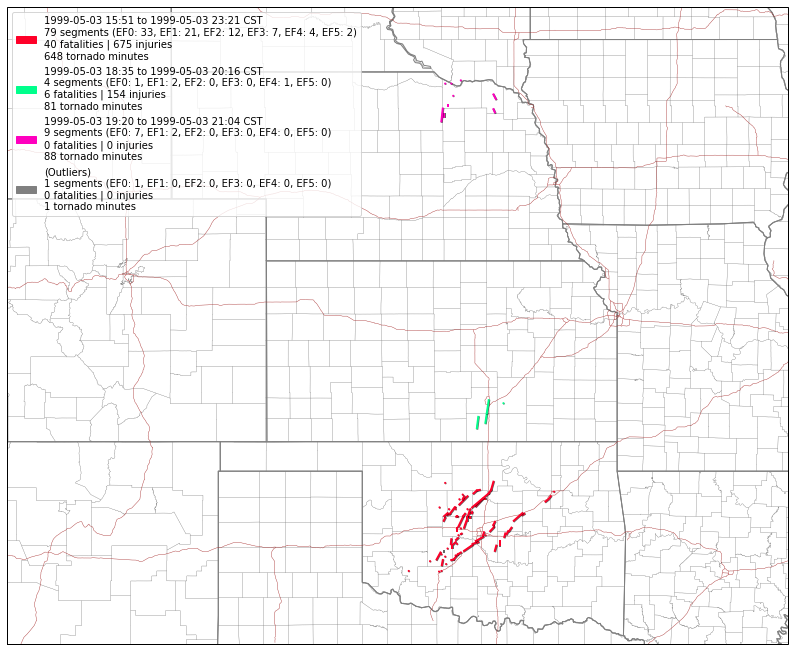

In [121]:
fig = plt.figure(figsize=(14, 14))
proj = ccrs.Mercator()
bgmap = CartopyMap(proj=proj, bbox=central_plains)
bgmap.draw_us_detailed()
clusters.plot.tornadoes(bgmap, colors='gist_rainbow', legend=True)